## Beautiful Demo

Loads training data and shows an example training face

In [1]:
from matplotlib import pyplot as plt
from read_data import training_validation

from time import time
from random import choice

(training_images, training_labels), (test_images, test_labels) = training_validation()

sample_image_positive = choice(training_images)
sample_image_negative = choice(test_images)

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(sample_image_positive)
ax2.imshow(sample_image_negative)
plt.show()



reading csv: 4.280760049819946
formatting to numpy matrices: 4.502217054367065
picking random data: 0.009638786315917969
Formatting data: 2.1219253540039062e-05


## Example of feature selection used

-39266.0
-40192.0
43606.0
-97683.0
-44400.0


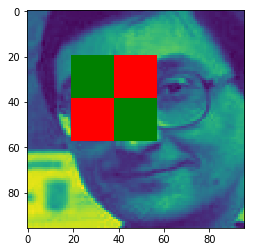

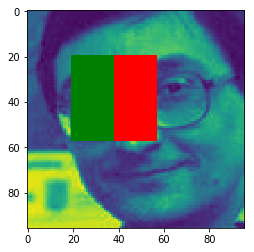

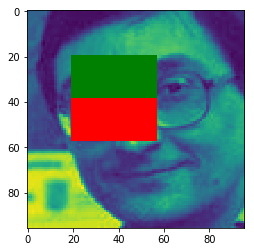

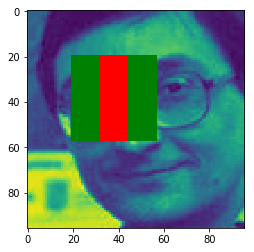

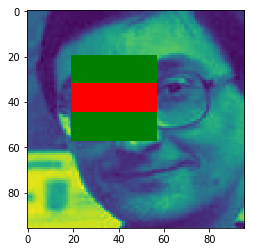

In [2]:
from features import *
from processing import IntegralImage

fsize = FeatureSize(0.2, 0.2, 0.4, 0.4)
ii = IntegralImage(sample_image_positive)
ii.process()

f = Feature(fsize, A)
fig, ax1 = plt.subplots(1, 1)
f.print_feature(ii, ax1)
print(f.calculate(ii))

f = Feature(fsize, B1)
fig, ax1 = plt.subplots(1, 1)
f.print_feature(ii, ax1)
print(f.calculate(ii))

f = Feature(fsize, B2)
fig, ax1 = plt.subplots(1, 1)
f.print_feature(ii, ax1)
print(f.calculate(ii))

f = Feature(fsize, C1)
fig, ax1 = plt.subplots(1, 1)
f.print_feature(ii, ax1)
print(f.calculate(ii))

f = Feature(fsize, C2)
fig, ax1 = plt.subplots(1, 1)
f.print_feature(ii, ax1)
print(f.calculate(ii))


plt.show()

## Example of Feature Generation

In [3]:
from features import *
count = 0
for sz in generate_all_sizes():
    count += 1
print(count)

3969


## Format training and test data

The format is adapted for the special ada boosted version, to extract features, therefore to train the normal bayes
we have to transpose the data to get image x features instead of features x images.

In [5]:
import processing
import features
import os
from numpy import save, load


training = None
test = None

if not os.path.isfile("training_feature_matrix.npy"):
    all_features = features.generate_all_features()

    IItraining = processing.bulk_II(training_images)
    IItest = processing.bulk_II(test_images)

    training = features.get_feature_matrix(IItraining, all_features)
    test = features.get_feature_matrix(IItest, all_features)

    """ _ is same as above. """

    save("training_feature_matrix", training)
    save("test_feature_matrix", test)

    training_for_bayes = training.T
    test_for_bayes = test.T
else:
    training = load("training_feature_matrix.npy")
    test = load("test_feature_matrix.npy")
    


Generate all features: 0.058606863021850586
Processing all integral images: 51.24215292930603
Processing all integral images: 52.92279291152954
get feature matrix: 204.82388830184937
get feature matrix: 203.92183804512024


## Testing Naive Bayes 

Naive bayes based on Normal distribution

In [ ]:
from naive_bayes import naive_bayes
from numpy import array, save
from sys import stdout


classifier = naive_bayes()
training_labels = array(training_labels)
print(training_labels)

classifier.train(training_for_bayes, training_labels)
correct = 0
total = len(test_for_bayes)
print(total)

false_positive = None
false_negative = None

false_positives = 0
false_negatives = 0 
for index, image in enumerate(test_for_bayes):
    stdout.write("\r\r\r" + str(index) + str("\r\r\r"))
    
    prediction = classifier.predict(image)
    label = test_labels[index]
    
    false_positives += (prediction == 1 and label == 0)
    false_negatives += (prediction == 0 and label == 1)
    
    if prediction == 1 and label == 0:
        false_positive = test_images[index]
    
    if prediction == 0 and label == 0:
        false_negative = test_images[index]
        
    correct += 1 if classifier.predict(image) != test_labels[index] else 0
    

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [12]:
print(correct)

725


In [13]:
print(correct / total)

0.7631578947368421
